In [54]:
import pandas as pd
import numpy as np
import datetime as dt
import pickle
import seaborn as sb
import warnings as wn
wn.filterwarnings('ignore')

import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pylab as plt
from matplotlib import pyplot
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 6
plt.style.use('ggplot')

from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU
from tensorflow.keras.models import load_model

In [2]:
data=pd.read_csv('final_Dataset.csv')
data

,Date,Total Yield [kWh],GridDurationHours,MaintDurationHours,DelREMO,Max,Min,Temp,Prcp,Cloud Cover,Conditions
0,2019-02-01,190.30,0.000000,0.000000,0.000000,20.1,9.2,14.3,1.75,67.1,"Rain, Partially cloudy"
1,2019-02-02,246.50,0.004167,0.000000,0.000000,19.7,7.1,12.4,0.00,12.0,Clear
2,2019-02-03,227.30,0.000000,0.000000,0.000000,19.2,8.1,12.3,0.00,0.0,Clear
3,2019-02-04,205.90,0.001944,0.000000,0.000000,19.5,5.1,12.1,0.00,40.7,Partially cloudy
4,2019-02-05,191.50,0.003889,0.000000,4.345833,23.1,9.7,16.2,0.00,74.2,Partially cloudy
...,...,...,...,...,...,...,...,...,...,...,...
846,2021-05-27,343.09,0.000000,0.000000,0.000000,41.6,22.9,32.8,0.00,0.0,Clear
847,2021-05-28,338.41,0.003889,0.000000,0.505556,39.5,27.4,32.9,0.00,0.2,Clear
848,2021-05-29,317.39,0.000000,0.000000,0.000000,36.6,20.7,31.0,12.86,13.0,Rain
849,2021-05-30,0.00,0.000000,13.978889,0.336667,34.1,23.1,28.9,9.85,2.6,Rain


In [3]:
data2=pd.read_csv('transformed_final_dataset.csv')
data2

,Date,Total Yield (Smooth),GridDurationHours,MaintDurationHours,DelREMO,Temp (Smooth),Cloud Cover (Smooth)
0,2019-02-01,12.686667,0.000000,0.0,0.000000,0.953333,4.473333
1,2019-02-02,29.120000,0.004167,0.0,0.000000,1.780000,5.273333
2,2019-02-03,44.273333,0.000000,0.0,0.000000,2.600000,5.273333
3,2019-02-04,58.000000,0.001944,0.0,0.000000,3.406667,7.986667
4,2019-02-05,70.766667,0.003889,0.0,4.345833,4.486667,12.933333
...,...,...,...,...,...,...,...
844,2021-05-25,281.485333,0.002222,0.0,1.468611,28.340000,39.026667
845,2021-05-26,287.559333,0.000000,0.0,0.000000,28.600000,36.240000
846,2021-05-27,292.918667,0.000000,0.0,0.000000,29.106667,32.893333
847,2021-05-28,303.406667,0.003889,0.0,0.505556,29.640000,28.026667


In [4]:
data=data.drop(columns=['Max','Min'])

In [5]:
data['Date']=pd.to_datetime(data['Date'])
data2['Date']=pd.to_datetime(data2['Date'])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851 entries, 0 to 850
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                851 non-null    datetime64[ns]
 1   Total Yield [kWh]   851 non-null    float64       
 2   GridDurationHours   851 non-null    float64       
 3   MaintDurationHours  851 non-null    float64       
 4   DelREMO             851 non-null    float64       
 5   Temp                851 non-null    float64       
 6   Prcp                851 non-null    float64       
 7   Cloud Cover         851 non-null    float64       
 8   Conditions          851 non-null    object        
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 60.0+ KB


In [7]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 849 entries, 0 to 848
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  849 non-null    datetime64[ns]
 1   Total Yield (Smooth)  849 non-null    float64       
 2   GridDurationHours     849 non-null    float64       
 3   MaintDurationHours    849 non-null    float64       
 4   DelREMO               849 non-null    float64       
 5   Temp (Smooth)         849 non-null    float64       
 6   Cloud Cover (Smooth)  849 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 46.6 KB


In [8]:
data.Conditions.unique()

array(['Rain, Partially cloudy', 'Clear', 'Partially cloudy', 'Overcast',
       'Rain, Overcast', 'Rain'], dtype=object)

In [9]:
enc=LabelEncoder()
data['Conditions']=enc.fit_transform(data['Conditions'])

In [10]:
data=data.set_index('Date')
data2=data2.set_index('Date')

In [11]:
data2

,Total Yield (Smooth),GridDurationHours,MaintDurationHours,DelREMO,Temp (Smooth),Cloud Cover (Smooth)
Date,,,,,,
2019-02-01,12.686667,0.000000,0.0,0.000000,0.953333,4.473333
2019-02-02,29.120000,0.004167,0.0,0.000000,1.780000,5.273333
2019-02-03,44.273333,0.000000,0.0,0.000000,2.600000,5.273333
2019-02-04,58.000000,0.001944,0.0,0.000000,3.406667,7.986667
2019-02-05,70.766667,0.003889,0.0,4.345833,4.486667,12.933333
...,...,...,...,...,...,...
2021-05-25,281.485333,0.002222,0.0,1.468611,28.340000,39.026667
2021-05-26,287.559333,0.000000,0.0,0.000000,28.600000,36.240000
2021-05-27,292.918667,0.000000,0.0,0.000000,29.106667,32.893333


In [12]:
data2.describe()

,Total Yield (Smooth),GridDurationHours,MaintDurationHours,DelREMO,Temp (Smooth),Cloud Cover (Smooth)
count,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000
mean,247.477319,0.021997,0.017676,0.744431,23.282772,31.195438
std,56.712502,0.334155,0.393630,2.153737,7.339479,17.519885
min,12.686667,0.000000,0.000000,0.000000,0.953333,0.220000
25%,210.328000,0.000000,0.000000,0.000000,16.686667,19.393333
50%,261.613333,0.000000,0.000000,0.000000,25.806667,29.960000
75%,289.732667,0.000000,0.000000,0.084444,29.653333,39.900000
max,349.260000,7.642222,10.590278,23.735833,34.826667,72.446667


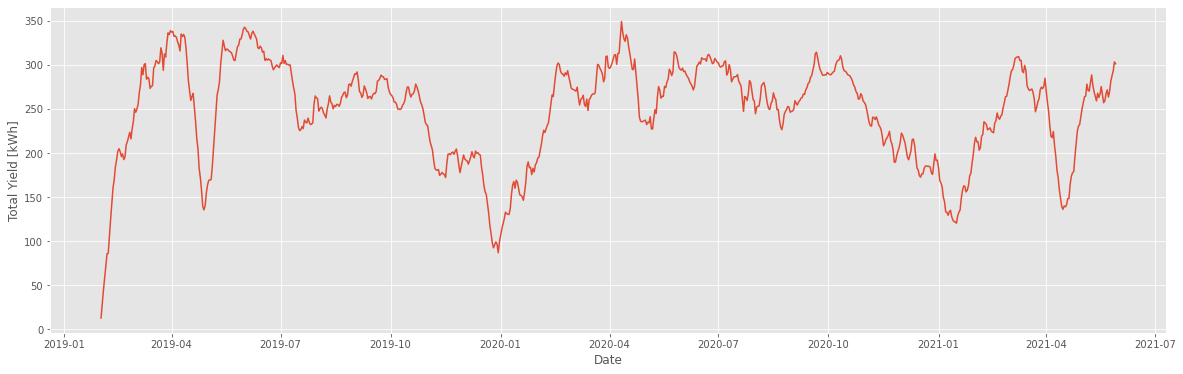

In [13]:
plt.xlabel('Date')
plt.ylabel('Total Yield [kWh]')
plt.plot(data2[data2.columns[0]])
plt.show()

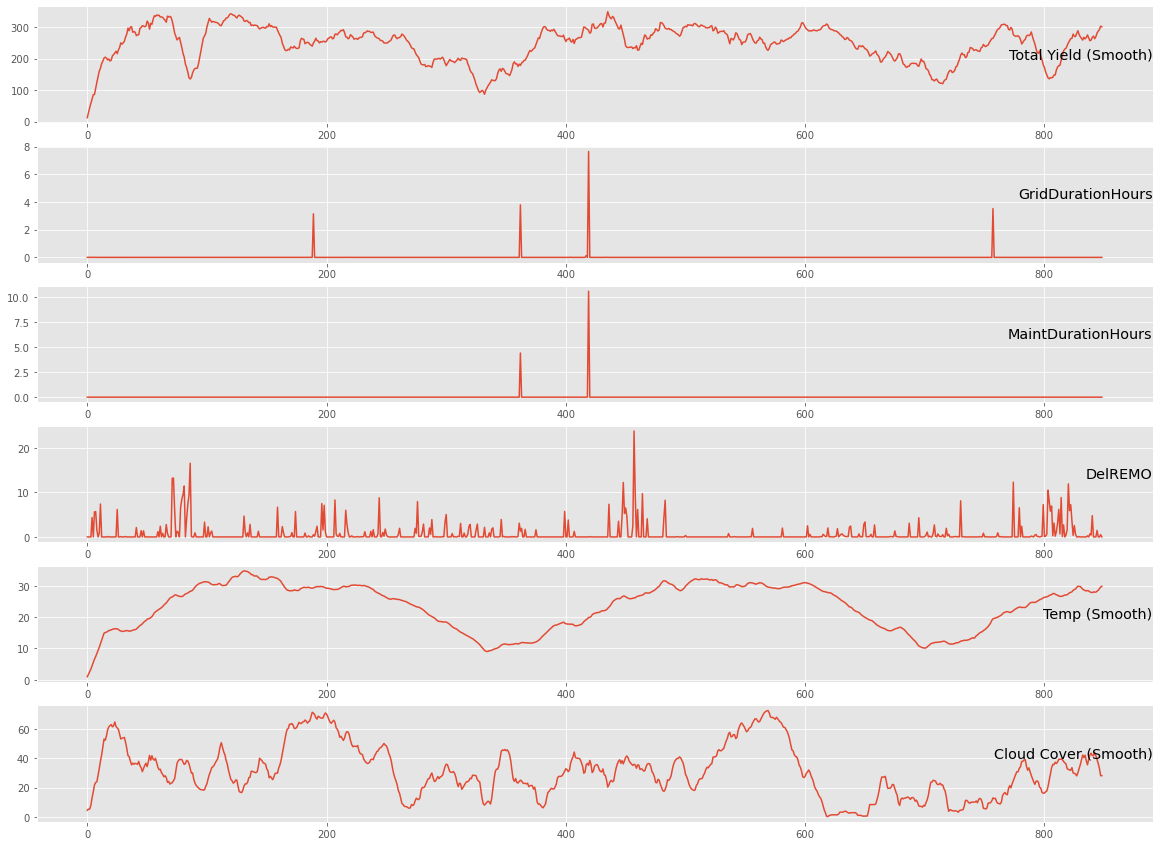

In [14]:
values = data2.values
groups = [0, 1, 2, 3, 4, 5]
i = 1
plt.figure(figsize=(20, 15))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(data2.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

In [15]:
values=np.round(data2.values,2)

In [16]:
values

array([[ 12.69,   0.  ,   0.  ,   0.  ,   0.95,   4.47],
       [ 29.12,   0.  ,   0.  ,   0.  ,   1.78,   5.27],
       [ 44.27,   0.  ,   0.  ,   0.  ,   2.6 ,   5.27],
       ...,
       [292.92,   0.  ,   0.  ,   0.  ,  29.11,  32.89],
       [303.41,   0.  ,   0.  ,   0.51,  29.64,  28.03],
       [301.23,   0.  ,   0.  ,   0.  ,  29.88,  28.09]])

In [17]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(values)

In [18]:
scaled

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05883982],
       [0.048816  , 0.        , 0.        , 0.        , 0.02449823,
        0.06991555],
       [0.09382892, 0.        , 0.        , 0.        , 0.0487013 ,
        0.06991555],
       ...,
       [0.8326054 , 0.        , 0.        , 0.        , 0.83116883,
        0.45230514],
       [0.86377277, 0.        , 0.        , 0.02148273, 0.84681228,
        0.38502007],
       [0.85729566, 0.        , 0.        , 0.        , 0.8538961 ,
        0.38585075]])

In [19]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
     # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [20]:
new_data=series_to_supervised(scaled)

In [21]:
new_data

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t)
1,0.000000,0.0,0.0,0.000000,0.000000,0.058840,0.048816,0.000000,0.0,0.000000,0.024498,0.069916
2,0.048816,0.0,0.0,0.000000,0.024498,0.069916,0.093829,0.000000,0.0,0.000000,0.048701,0.069916
3,0.093829,0.0,0.0,0.000000,0.048701,0.069916,0.134623,0.000000,0.0,0.000000,0.072609,0.107573
4,0.134623,0.0,0.0,0.000000,0.072609,0.107573,0.172564,0.000000,0.0,0.183235,0.104486,0.175966
5,0.172564,0.0,0.0,0.183235,0.104486,0.175966,0.216270,0.001309,0.0,0.000000,0.136954,0.234113
...,...,...,...,...,...,...,...,...,...,...,...,...
844,0.764031,0.0,0.0,0.000000,0.798701,0.574969,0.798645,0.000000,0.0,0.061921,0.808442,0.537311
845,0.798645,0.0,0.0,0.061921,0.808442,0.537311,0.816680,0.000000,0.0,0.000000,0.816116,0.498685
846,0.816680,0.0,0.0,0.000000,0.816116,0.498685,0.832605,0.000000,0.0,0.000000,0.831169,0.452305
847,0.832605,0.0,0.0,0.000000,0.831169,0.452305,0.863773,0.000000,0.0,0.021483,0.846812,0.385020


In [22]:
new_data.drop(new_data.columns[[7,8,9,10,11]], axis=1, inplace=True)
new_data

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var1(t)
1,0.000000,0.0,0.0,0.000000,0.000000,0.058840,0.048816
2,0.048816,0.0,0.0,0.000000,0.024498,0.069916,0.093829
3,0.093829,0.0,0.0,0.000000,0.048701,0.069916,0.134623
4,0.134623,0.0,0.0,0.000000,0.072609,0.107573,0.172564
5,0.172564,0.0,0.0,0.183235,0.104486,0.175966,0.216270
...,...,...,...,...,...,...,...
844,0.764031,0.0,0.0,0.000000,0.798701,0.574969,0.798645
845,0.798645,0.0,0.0,0.061921,0.808442,0.537311,0.816680
846,0.816680,0.0,0.0,0.000000,0.816116,0.498685,0.832605
847,0.832605,0.0,0.0,0.000000,0.831169,0.452305,0.863773


In [23]:
train=new_data[:730].values
test=new_data[730:].values

In [24]:
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

In [25]:
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

In [26]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(730, 1, 6) (730,) (118, 1, 6) (118,)


#### LSTM

In [27]:
model_lstm = Sequential()
model_lstm.add(LSTM(50, return_sequences=True,input_shape=(train_X.shape[1], train_X.shape[2])))
model_lstm.add(LSTM(units=30,return_sequences=True))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mae', optimizer='adam')
# fit network
history_lstm = model_lstm.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2021-12-09 01:00:57.309353: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-12-09 01:00:57.309906: W tensorflow/core/platform/profile_utils/cpu_utils.cc:126] Failed to get CPU frequency: 0 Hz


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
11/11 - 0s - loss: 0.6846 - val_loss: 0.6358
Epoch 2/50
11/11 - 0s - loss: 0.6101 - val_loss: 0.5546
Epoch 3/50
11/11 - 0s - loss: 0.5147 - val_loss: 0.4409
Epoch 4/50
11/11 - 0s - loss: 0.3747 - val_loss: 0.2711
Epoch 5/50
11/11 - 0s - loss: 0.1762 - val_loss: 0.1004
Epoch 6/50
11/11 - 0s - loss: 0.1154 - val_loss: 0.1012
Epoch 7/50
11/11 - 0s - loss: 0.1034 - va

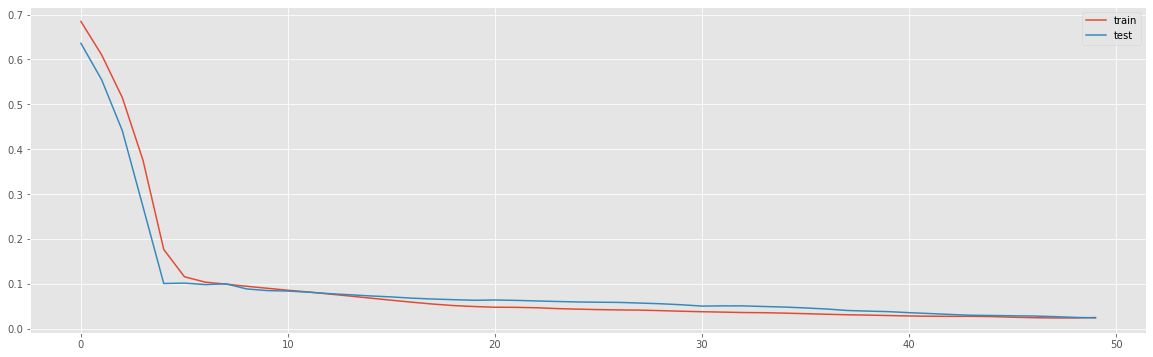

In [28]:
pyplot.plot(history_lstm.history['loss'], label='train')
pyplot.plot(history_lstm.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [29]:
def pred_func(model,test_X):
    predicted=model.predict(test_X)
    test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
    inv_pred = np.concatenate((predicted.reshape(-1,1), test_X[:, 1:]), axis=1)
    inv_pred = np.round(scaler.inverse_transform(inv_pred),-1)
    inv_pred = inv_pred[:,0]
    return inv_pred

In [30]:
predicted=model_lstm.predict(test_X)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [31]:
predicted_frame=pd.DataFrame(predicted.reshape(-1,1))
test_y_frame=pd.DataFrame(test_y)
test_y_frame=test_y_frame.rename(columns={0:'actual'})

In [32]:
compare=pd.concat([predicted_frame,test_y_frame],axis=1)
compare=compare.rename(columns={0:'predicted'})
compare

,predicted,actual
0,0.564104,0.609442
1,0.600746,0.594230
2,0.587649,0.594200
3,0.588815,0.565707
4,0.565529,0.574204
...,...,...
113,0.777806,0.798645
114,0.808628,0.816680
115,0.830972,0.832605
116,0.848209,0.863773


#### GRU

In [33]:
#@tf.autograph.experimental.do_not_convert
model_gru = Sequential()
model_gru.add(GRU(75, return_sequences=True,input_shape=(train_X.shape[1], train_X.shape[2])))
model_gru.add(GRU(units=30, return_sequences=True))
model_gru.add(GRU(units=30))
model_gru.add(Dense(units=1))

model_gru.compile(loss='mae', optimizer='adam')
history_gru = model_gru.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow t

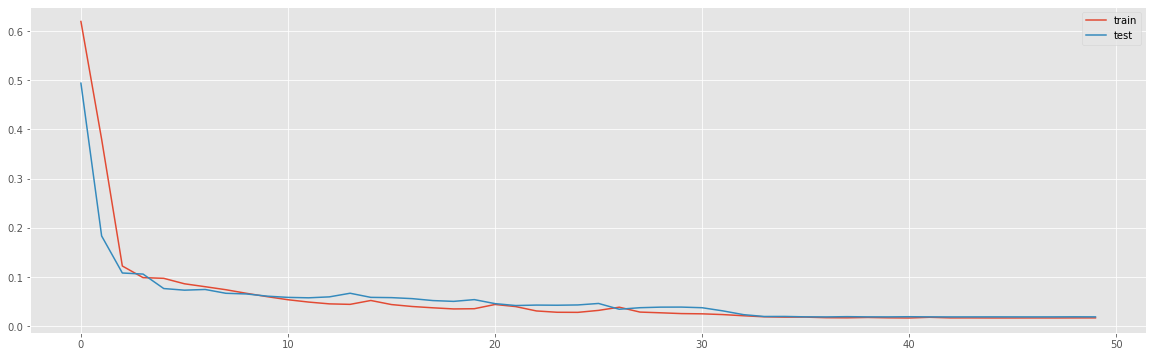

In [34]:
pyplot.plot(history_gru.history['loss'], label='train')
pyplot.plot(history_gru.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [35]:
pred_gru=model_gru.predict(test_X)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [36]:
predGru_frame=pd.DataFrame(pred_gru.reshape(-1,1))

In [37]:
compare_gru=pd.concat([predGru_frame,test_y_frame],axis=1)
compare_gru=compare_gru.rename(columns={0:'predicted'})
compare_gru

,predicted,actual
0,0.582401,0.609442
1,0.611132,0.594230
2,0.596219,0.594200
3,0.597185,0.565707
4,0.570758,0.574204
...,...,...
113,0.769437,0.798645
114,0.801770,0.816680
115,0.821349,0.832605
116,0.836505,0.863773


In [38]:
inv_pred=pred_func(model_lstm,test_X)
inv_predGru=pred_func(model_gru,test_X)

In [39]:
test_y = test_y.reshape((len(test_y), 1))
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
inv_y = np.concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [40]:
predicted_frame2=pd.DataFrame(inv_pred.reshape(-1,1))
test_y_frame2=pd.DataFrame(inv_y)
test_y_frame2=test_y_frame2.rename(columns={0:'actual'})

In [41]:
compare2=pd.concat([predicted_frame2,test_y_frame2],axis=1)
compare2=compare2.rename(columns={0:'predicted'})
compare2

,predicted,actual
0,200.0,217.81
1,210.0,212.69
2,210.0,212.68
3,210.0,203.09
4,200.0,205.95
...,...,...
113,270.0,281.49
114,280.0,287.56
115,290.0,292.92
116,300.0,303.41


In [42]:
rmse = np.sqrt(mean_squared_error(inv_y, inv_pred))
print('Test RMSE (LSTM): %.3f' % rmse)

Test RMSE (LSTM): 10.885


In [43]:
predGru_frame2=pd.DataFrame(inv_predGru.reshape(-1,1))
compare_gru2=pd.concat([predGru_frame2,test_y_frame2],axis=1)
compare_gru2=compare_gru2.rename(columns={0:'predicted'})
compare_gru2

,predicted,actual
0,210.0,217.81
1,220.0,212.69
2,210.0,212.68
3,210.0,203.09
4,200.0,205.95
...,...,...
113,270.0,281.49
114,280.0,287.56
115,290.0,292.92
116,290.0,303.41


In [44]:
rmse_gru = np.sqrt(mean_squared_error(inv_y, inv_predGru))
print('Test RMSE (GRU): %.3f' % rmse_gru)

Test RMSE (GRU): 8.876


In [45]:
arr=np.array([[[2,2,3,4,5,6]]])
temp=pred_func(model_gru,arr)
temp

array([330.])

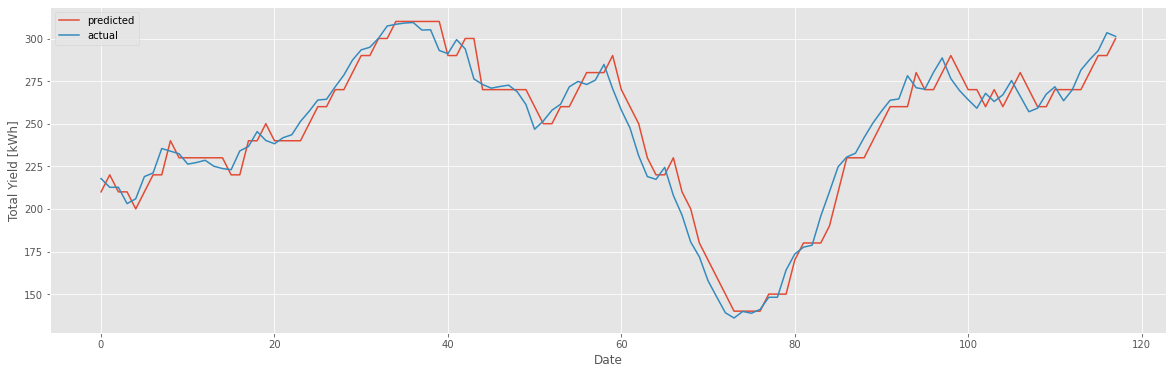

In [46]:
plt.xlabel('Date')
plt.ylabel('Total Yield [kWh]')
plt.plot(compare_gru2)
plt.legend(['predicted','actual'])
plt.show()

In [50]:
model_gru.save("gru_model.h5")

In [51]:
gru_model = load_model('gru_model.h5')

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


array([330.])

In [55]:
temp_test=data2[731:]
temp_train=data2[:731]

In [67]:
data=data.reset_index()
data2=data2.reset_index()
temp_train=temp_train.reset_index()
temp_test=temp_test.reset_index()

In [71]:
predicted_frame2=predGru_frame2.rename(columns={0:'predicted'})
predicted_frame2

,predicted
0,210.0
1,220.0
2,210.0
3,210.0
4,200.0
...,...
113,270.0
114,280.0
115,290.0
116,290.0


In [73]:
temp_test=pd.concat([temp_test,predicted_frame2],axis=1)
temp_test

,Date,Total Yield (Smooth),GridDurationHours,MaintDurationHours,DelREMO,Temp (Smooth),Cloud Cover (Smooth),predicted
0,2021-02-01,217.813333,0.000000,0.0,0.000000,12.446667,4.713333,210.0
1,2021-02-02,212.686000,0.000000,0.0,0.084167,12.473333,4.866667,220.0
2,2021-02-03,212.680000,0.000000,0.0,0.000000,12.620000,7.340000,210.0
3,2021-02-04,203.086667,0.000000,0.0,0.000000,12.586667,11.153333,210.0
4,2021-02-05,205.953333,0.000000,0.0,0.000000,12.600000,11.280000,200.0
...,...,...,...,...,...,...,...,...
113,2021-05-25,281.485333,0.002222,0.0,1.468611,28.340000,39.026667,270.0
114,2021-05-26,287.559333,0.000000,0.0,0.000000,28.600000,36.240000,280.0
115,2021-05-27,292.918667,0.000000,0.0,0.000000,29.106667,32.893333,290.0
116,2021-05-28,303.406667,0.003889,0.0,0.505556,29.640000,28.026667,290.0


In [76]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=temp_train['Date'],y=temp_train['Total Yield (Smooth)'],mode='lines', name='Train Total Yield (Smoothed)'))
fig.add_trace(go.Scatter(x=temp_test['Date'],y=temp_test['Total Yield (Smooth)'],mode='lines', name='Test Total Yield (Smoothed)'))
fig.add_trace(go.Scatter(x=temp_test['Date'],y=temp_test['predicted'],mode='lines', name='predicted Total Yield'))
fig.update_xaxes(rangeslider_visible=True)